In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [187]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [161]:
df = pd.read_csv('/content/insurance.csv')

In [162]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1338 rows × 7 columns

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [164]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [165]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['sex', 'smoker', 'region'], dtype='object')

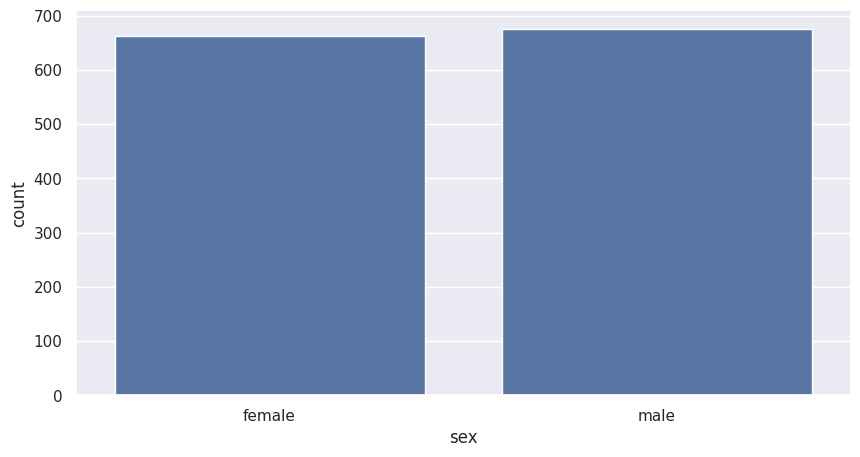

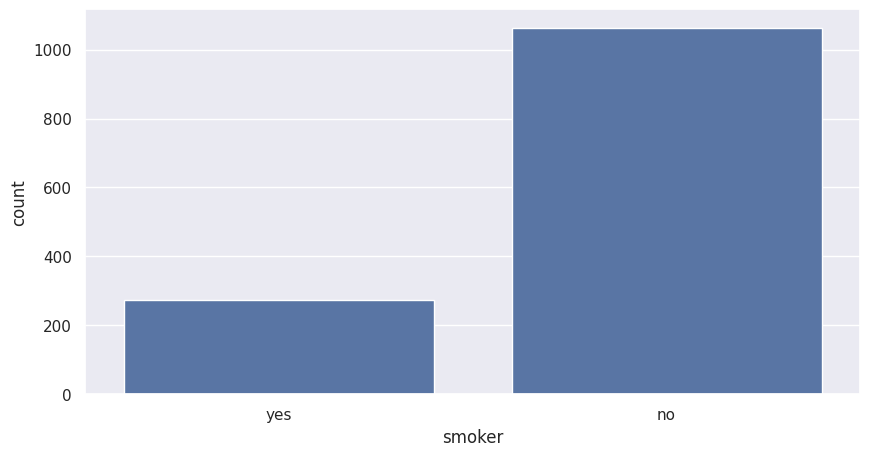

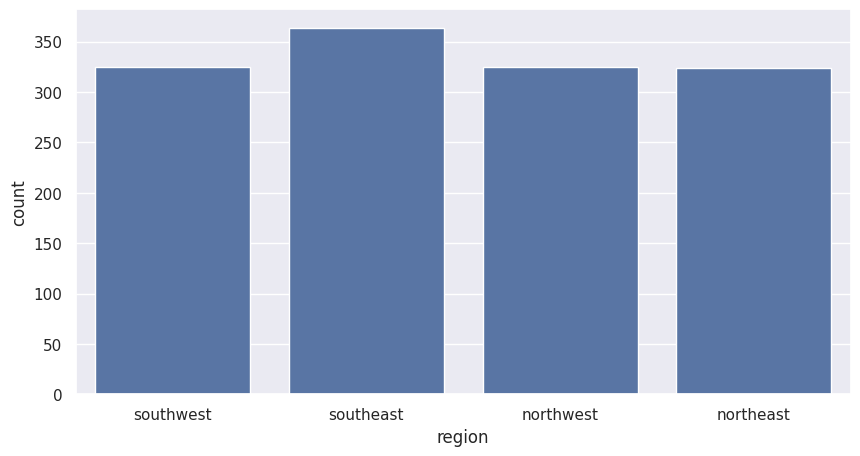

In [166]:
#Ploting fo rcategorical features
for col in cat_features:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col,data=df)

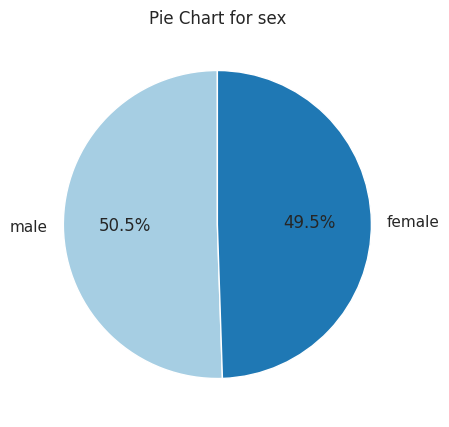

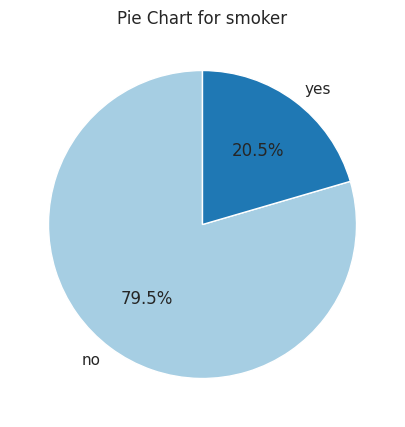

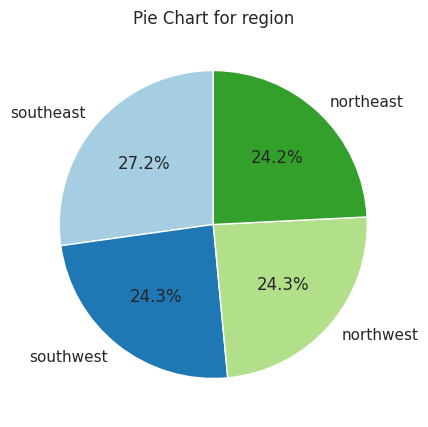

In [167]:
import matplotlib.pyplot as plt

for col in cat_features:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'Pie Chart for {col}')
    plt.ylabel('')  # Removes the default ylabel
    plt.show()


In [168]:
# statistical Measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


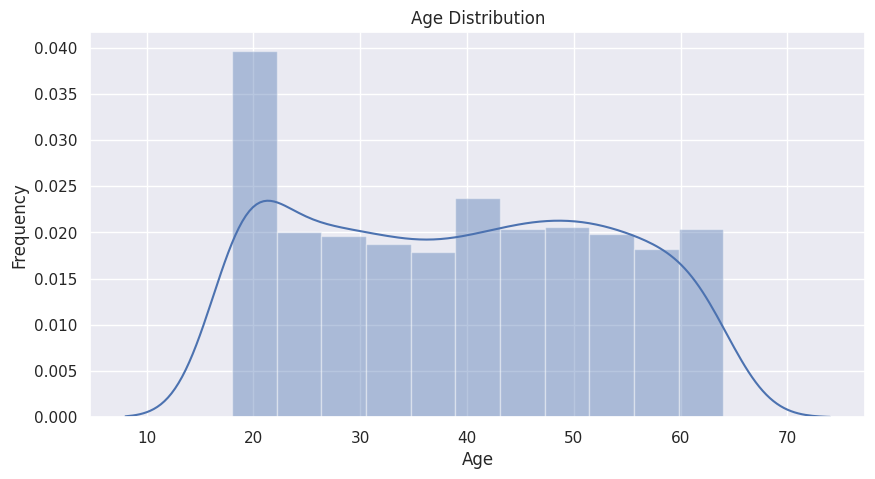

In [169]:
sns.set()
plt.figure(figsize=(10,5))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [170]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


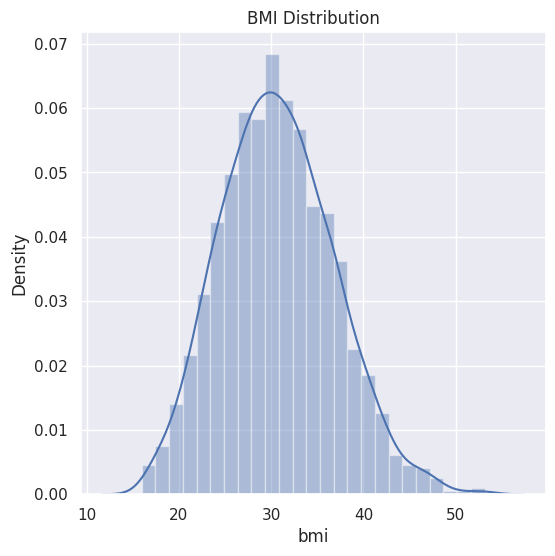

In [171]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

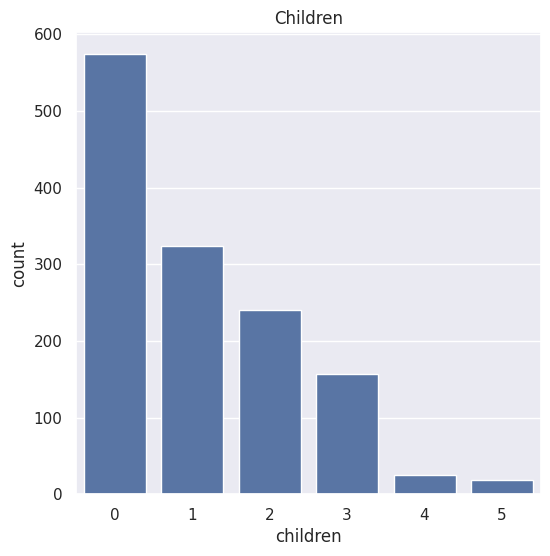

In [172]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

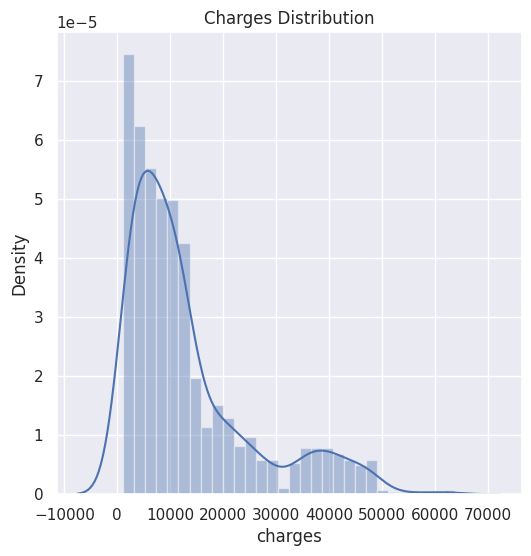

In [173]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

Data preprocessing

In [174]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [175]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [176]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.455904,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [177]:
from re import X
X = df.drop('charges', axis=1)
y = df['charges']

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [179]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [180]:
# List of models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Support Vector Regression': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2 Score': r2}

# Find the best model based on R2 Score
best_model = max(results.items(), key=lambda x: x[1]['R2 Score'])

# Display results
for model, metrics in results.items():
    print(f"{model}: MSE = {metrics['MSE']:.2f}, R2 Score = {metrics['R2 Score']:.2f}")

print("\nBest Model:")
print(f"{best_model[0]}: MSE = {best_model[1]['MSE']:.2f}, R2 Score = {best_model[1]['R2 Score']:.2f}")


Linear Regression: MSE = 33685623.35, R2 Score = 0.78
Ridge Regression: MSE = 33693419.49, R2 Score = 0.78
Lasso Regression: MSE = 33689145.48, R2 Score = 0.78
ElasticNet: MSE = 49265620.65, R2 Score = 0.68
Support Vector Regression: MSE = 165926860.21, R2 Score = -0.07
Decision Tree: MSE = 45570383.24, R2 Score = 0.71
Random Forest: MSE = 21262175.82, R2 Score = 0.86
Gradient Boosting: MSE = 18686549.01, R2 Score = 0.88
AdaBoost: MSE = 26103236.95, R2 Score = 0.83

Best Model:
Gradient Boosting: MSE = 18686549.01, R2 Score = 0.88


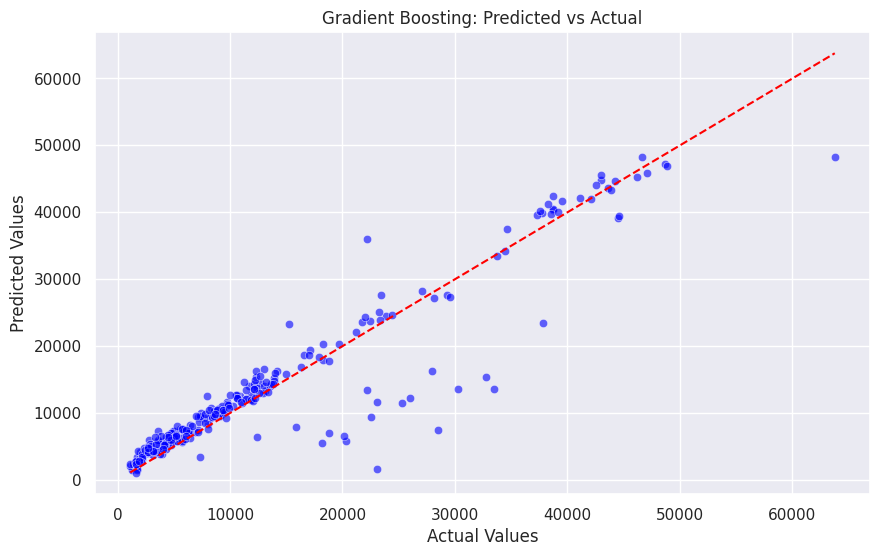

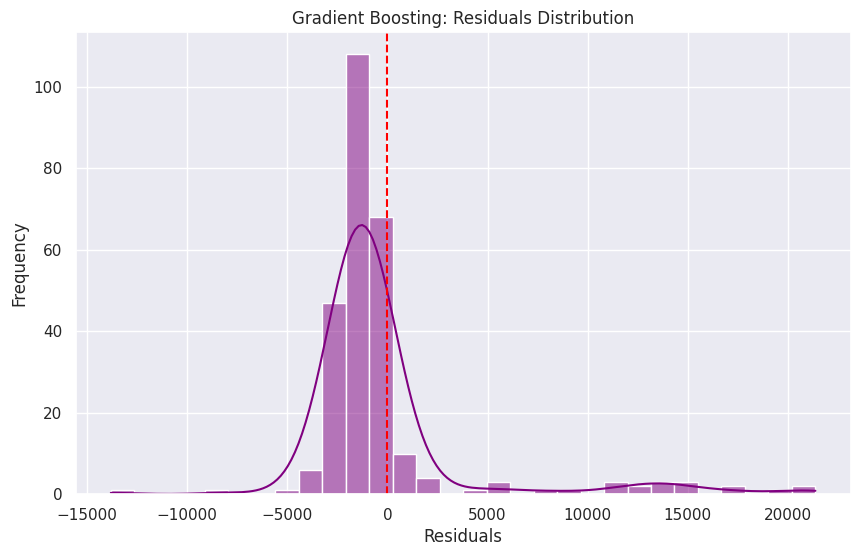

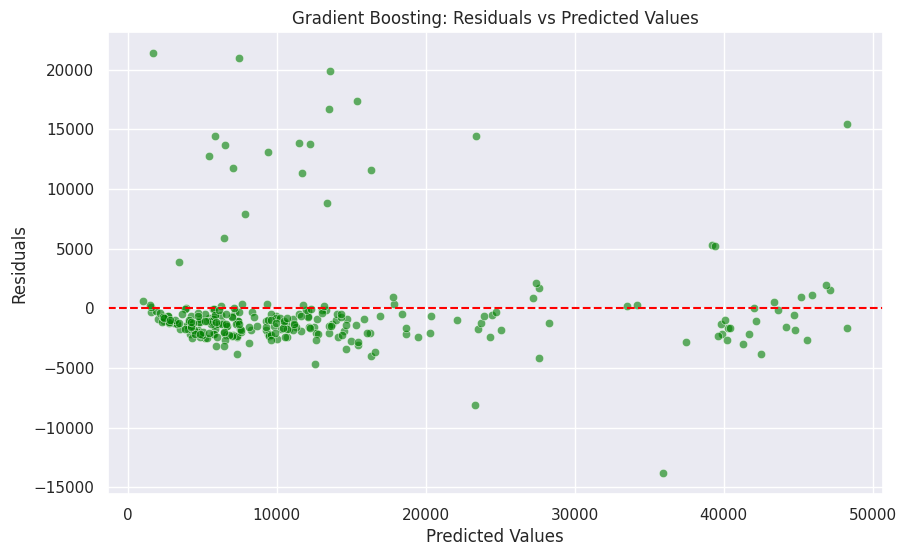

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Train the Gradient Boosting model (if not already trained)
best_model_instance = GradientBoostingRegressor()
best_model_instance.fit(X_train, y_train)
y_pred = best_model_instance.predict(X_test)

# Plot 1: Predicted vs Actual Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Gradient Boosting: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Plot 2: Residuals (Errors) Distribution
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Gradient Boosting: Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()

# Plot 3: Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Gradient Boosting: Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [182]:
import pickle
# Save Gradient Boosting model
with open('gradient_boosting_model.pkl', 'wb') as model_file:
    pickle.dump(best_model_instance, model_file)

# Save scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save encoder
with open('encoder.pkl', 'wb') as encoder_file:
    pickle.dump(encoder, encoder_file)

print("Model, scaler, and encoder saved successfully!")

Model, scaler, and encoder saved successfully!


In [183]:
# Load the model, scaler, and encoder
with open('gradient_boosting_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

with open('encoder.pkl', 'rb') as encoder_file:
    loaded_encoder = pickle.load(encoder_file)


In [186]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

# Load the pre-trained scaler and model
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

with open('/content/gradient_boosting_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Simulate new data for prediction
new_data = pd.DataFrame({
    'age': [28],
    'sex': ['male'],
    'bmi': [26.3],
    'children': [1],
    'smoker': ['yes'],
    'region': ['southwest']
})



new_data.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
new_data.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
new_data.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

# Scale the new data using the previously loaded scaler
new_data_scaled = loaded_scaler.transform(new_data)

# Use the loaded model to make predictions
prediction = loaded_model.predict(new_data_scaled)

# Output the prediction
print("Prediction on new data (charges):", prediction)


Prediction on new data (charges): [18773.28852985]
